# I. 3D model

In [1]:
from simple_maize import *
from plant_design import polym_integral_rel
from matplotlib.pylab import plot, show, xlim, ylim, axes
import numpy
from TD_maize import maize,display,generate_mtg, illuminate,plant_irradiance, process
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Parameters range are done in TD_sensitivity_Agreenium.R

## I.1 plant height

In [10]:
phytomer=16
nb_young_phy = int(round((phytomer - 1.95) / 1.84 / 1.3))
pseudostem_dist=1.4
pseudostem_height=20
stem_dist=1.
pseudostem = geometric_dist(height=pseudostem_height, nb_phy=nb_young_phy,q=pseudostem_dist)

plant_height_min=50
plant_height_max=300

stem_min = geometric_dist(height=plant_height_min - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)
stem_max = geometric_dist(height=plant_height_max - pseudostem_height,nb_phy=phytomer - nb_young_phy, q=stem_dist)

stem_min,stem_max

([3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0],
 [28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0])

## I.2 Leaf area distribution along the stem

relative position of the leaf with highest area (rmax)

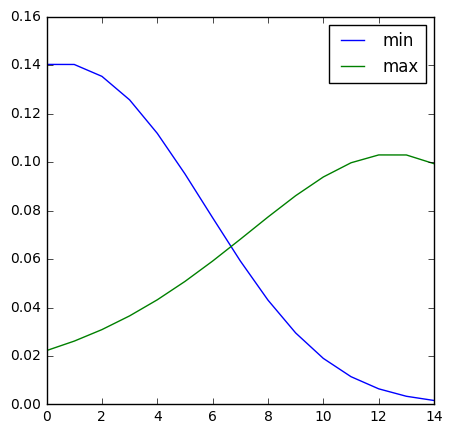

In [11]:
rmax_min=0.1
rmax_max=0.9
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_min,skew=0.15)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=rmax_max,skew=0.15)
plot(ymin,label='min')
plot(ymax,label='max')
plt.legend(loc='best')
plt.show()


skewness of leaf area distribution (skew)

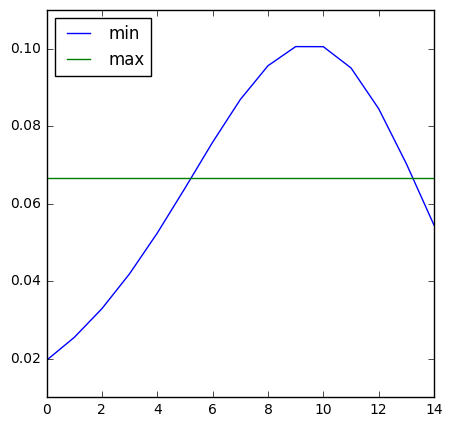

In [12]:
skew_min=0.05
skew_max=1
ymin=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=0.7,skew=skew_min)
ymax=bell_shaped_dist(plant_area=1,nb_phy=15,rmax=0.7,skew=skew_max)
plot(ymin,label='min')
plot(ymax,label='max')
plt.legend(loc='best')
plt.show()

## I.3 leaf shape

ratio widht/length (wl)

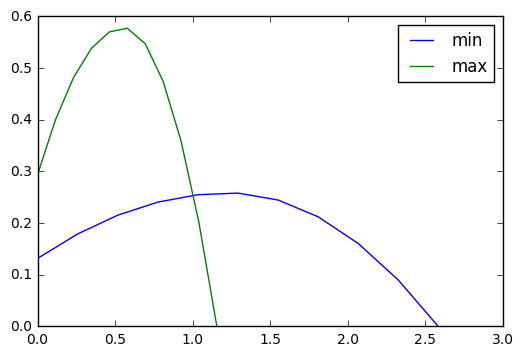

In [6]:
# fixed parameters
leaf_area=0.5
wl_int=0.08
w0_int=0.5
lm_int=0.5

# variables and parameters
leaf_rank=1
wl_slp=0.003
w0_slp=0.01
lm_slp=-.02

w0=w0_int+w0_slp*leaf_rank
lm=lm_int+lm_slp*leaf_rank

# leaf morpho
s,r=leaf_morpho_rel(nb_segment=10, w0=w0, lm=lm) #relative shape

# relative leaf area

area_rel_sim=polym_integral_rel(w0=w0, lm=lm)

wl_min=0.1
l_min=sqrt(leaf_area/(area_rel_sim*wl_min))
w_min=l_min*wl_min
s_min,r_min=s*l_min,r*w_min

wl_max=0.5
l_max=sqrt(leaf_area/(area_rel_sim*wl_max))
w_max=l_max*wl_max
s_max,r_max=s*l_max,r*w_max

plot(s_min,r_min,label='min')
plot(s_max,r_max,label='max')
plt.legend(loc='best')
plt.show()

##  I.4 Leaf curvature

### II.4.1 Base function

In [7]:
leaf_shape_perez(nb_segment = 100,insertion_angle=50, l=0.5, infl=30)

(array([ 0.        ,  0.00383022,  0.00766089,  0.01149291,  0.01532716,
         0.01916454,  0.02300593,  0.02685224,  0.03070434,  0.0345631 ,
         0.03842941,  0.04230413,  0.04618812,  0.05008223,  0.05398731,
         0.0579042 ,  0.06183372,  0.06577668,  0.0697339 ,  0.07370615,
         0.07769422,  0.08169887,  0.08572085,  0.08976088,  0.09381968,
         0.09789794,  0.10199634,  0.10611551,  0.1102561 ,  0.1144187 ,
         0.11860389,  0.12281223,  0.12704423,  0.13130037,  0.13558113,
         0.13988693,  0.14421815,  0.14857514,  0.15295821,  0.15736763,
         0.16180362,  0.16626637,  0.17075599,  0.17527257,  0.17981612,
         0.18438661,  0.18898394,  0.19360796,  0.19825845,  0.2029351 ,
         0.20763757,  0.2123654 ,  0.21711807,  0.221895  ,  0.22669548,
         0.23151874,  0.23636391,  0.24123002,  0.24611598,  0.25102063,
         0.25594267,  0.26088069,  0.26583317,  0.27079844,  0.27577472,
         0.2807601 ,  0.2857525 ,  0.29074973,  0.2

### I.4.2 insertion angle

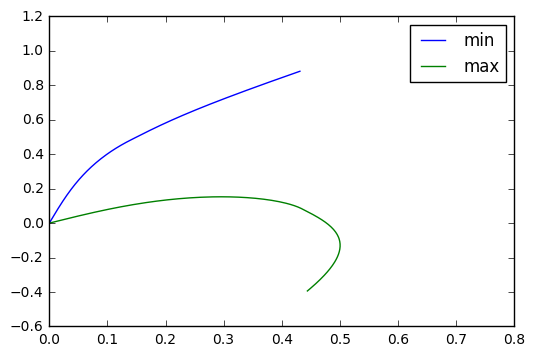

In [15]:
insertion_min=10
insertion_max=50

xmin,ymin=leaf_shape_perez(nb_segment = 100,insertion_angle=insertion_min, l=0.5, infl=30)
xmax,ymax=leaf_shape_perez(nb_segment = 100,insertion_angle=insertion_max, l=0.5, infl=30)
plot(xmin,ymin,label='min')
plot(xmax,ymax,label='max')
xlim(0,0.8)
ylim(-0.6,1.2)
plt.legend(loc='best')
plt.show()

### I.4.3 inflexion effect

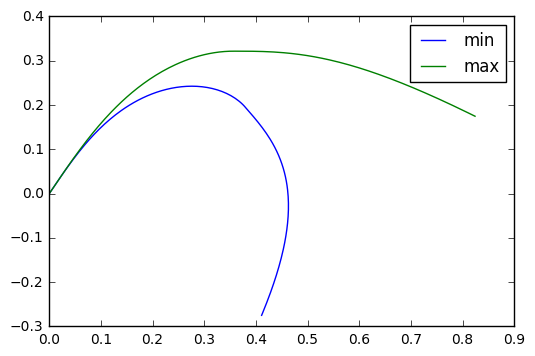

In [16]:
infl_min=10
infl_max=30

xmin,ymin=leaf_shape_perez(nb_segment = 100,insertion_angle=30, l=0.5, infl=infl_min)
xmax,ymax=leaf_shape_perez(nb_segment = 100,insertion_angle=30, l=0.5, infl=infl_max)
plot(xmin,ymin,label='min')
plot(xmax,ymax,label='max')
plt.legend(loc='best')
plt.show()

### I.4.4 Variation of curvature with leaf rank

In [35]:
def leaf_shape_rank(rank=1,nb_segment=100,incli_top=10, incli_base=70, insertion_angle=20,l=0.5, infl=30):
    phytomer=16
    dinc = float(incli_top - incli_base) / (phytomer - 1)
    incli = incli_base + (rank -1) * dinc
    return leaf_shape_perez(nb_segment = 100,insertion_angle=incli, l=l, infl=infl)

#### Curvature of top leaf (rank16)

Variation of top leaf insertion (incli_top)

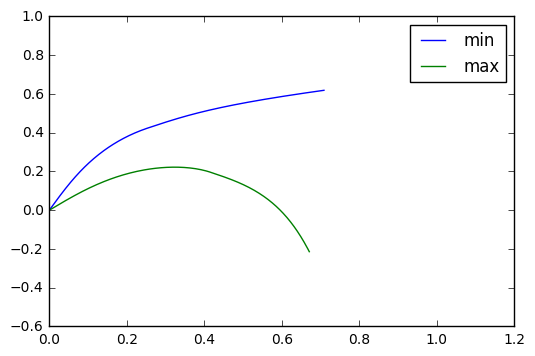

In [34]:
rank=16
incli_top_min=20
incli_top_max=40

x_min,y_min=leaf_shape_rank(rank=rank,incli_top=incli_top_min)
x_max,y_max=leaf_shape_rank(rank=rank,incli_top=incli_top_max)

plot(x_min,y_min,label='min')
plot(x_max,y_max,label='max')
xlim(0,1.2)
ylim(-0.6,1)
plt.legend(loc='best')
plt.show()


#### Curvature of base leaf (rank1)

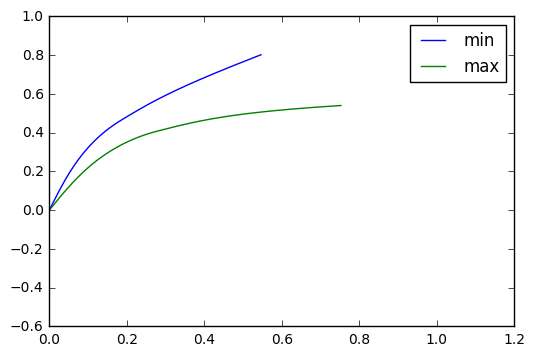

In [44]:
rank=10
incli_base_min=20
incli_base_max=40

x_min,y_min=leaf_shape_rank(rank=rank,incli_base=incli_base_min)
x_max,y_max=leaf_shape_rank(rank=rank,incli_base=incli_base_max)

plot(x_min,y_min,label='min')
plot(x_max,y_max,label='max')
xlim(0,1.2)
ylim(-0.6,1)
plt.legend(loc='best')
plt.show()

#### Variation of curvature (infl) and leaf insertion with rank

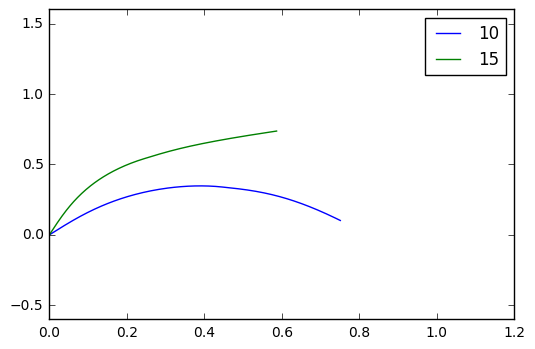

In [45]:
rank=10
x,y=leaf_shape_rank(rank=rank,incli_top=10,incli_base=60,infl=25,l=0.6)
plot(x,y,label=rank)

rank=15
x,y=leaf_shape_rank(rank=rank,incli_top=10,incli_base=60,infl=25,l=0.6)
plot(x,y,label=rank)

xlim(0,1.2)
ylim(-0.6,1.6)
plt.legend(loc='best')
plt.show()

## I.5 Phyllotaxis

phyllotactic_angle

Populating the interactive namespace from numpy and matplotlib


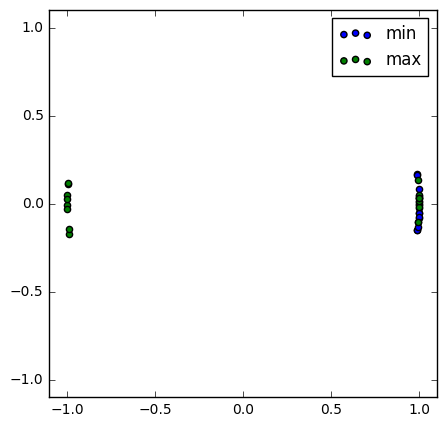

In [48]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_angle_min=0
phyllotactic_angle_max=180

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_min, phyllotactic_deviation=10, plant_orientation=0, spiral=True)*pi/180
az_max=leaf_azimuth(size=phytomer, phyllotactic_angle=phyllotactic_angle_max, phyllotactic_deviation=10, plant_orientation=0, spiral=True)*pi/180

x_min,y_min=pol2cart(rho=1,phi=az_min)
x_max,y_max=pol2cart(rho=1,phi=az_max)
    
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue',label='min')
scatter(x_max,y_max,c='green',label='max')
xlim(-1.1,1.1)
ylim(-1.1,1.1)
plt.legend(loc='best')
plt.show()

phyllotactic_deviation

Populating the interactive namespace from numpy and matplotlib


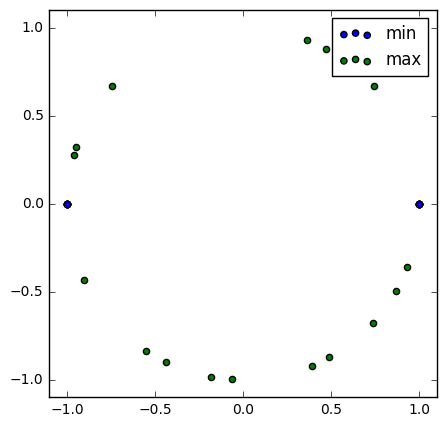

In [49]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

phytomer=16
phyllotactic_deviation_min=0
phyllotactic_deviation_max=90

az_min=leaf_azimuth(size=phytomer, phyllotactic_angle=180, phyllotactic_deviation=phyllotactic_deviation_min, plant_orientation=0, spiral=True)*pi/180
az_max=leaf_azimuth(size=phytomer, phyllotactic_angle=180, phyllotactic_deviation=phyllotactic_deviation_max, plant_orientation=0, spiral=True)*pi/180

x_min,y_min=pol2cart(rho=1,phi=az_min)
x_max,y_max=pol2cart(rho=1,phi=az_max)
    
%pylab inline
pylab.rcParams['figure.figsize'] = (5, 5)
#scatter(x,y,c=numpy.arange(phytomer))
scatter(x_min,y_min,c='blue',label='min')
scatter(x_max,y_max,c='green',label='max')
xlim(-1.1,1.1)
ylim(-1.1,1.1)
plt.legend(loc='best')
plt.show()

# II. Visualisation of 3D reconstructions and estimation of light interception

## II.1 Generate the mtg

In [26]:
g=generate_mtg(plant_height=300,
                 rmax=0.5,
                 skew=0.2,
                 wl=0.15,
                 incli_base=75,
                 incli_top=15,
                 delta_angle_base=250,
                 delta_angle_top=35,
                 plant_orientation=0,
                 phyllotactic_angle=180,
                 phyllotactic_deviation=10,
                 nb_leaf_segment=10)

## II.2 Illuminate the 3D plant 

In [27]:
plant_irradiance(g, isolated=True, illuminated=None)

{'Area': 0.8376534793,
 'Area_leaf': 0.6964331897,
 'Ei': 0.6550364012727297,
 'Ei_leaf': 0.7225305657168497}

## II.3 Visualisation

In [28]:
%gui qt4
from TD_maize import display

Raw visualisation

In [29]:
display(g,light=False)

Visualisation with irradiance

In [30]:
display(g,light=True)

# III. Run simulation for sensitivity analysis


In [2]:
input='planMorris.csv'
output='resMorris_isolated.csv'

process(path_input=input, path_output=output, nb_process=4, isolated=True)

run_sim_xrun : 0 / 300
run_sim_xrun : 1 / 300
run_sim_xrun : 2 / 300
run_sim_xrun : 3 / 300
run_sim_xrun : 4 / 300
run_sim_xrun : 5 / 300
run_sim_xrun : 6 / 300
run_sim_xrun : 7 / 300
run_sim_xrun : 8 / 300
run_sim_xrun : 9 / 300
run_sim_xrun : 10 / 300
run_sim_xrun : 11 / 300
run_sim_xrun : 12 / 300
run_sim_xrun : 13 / 300
run_sim_xrun : 14 / 300
run_sim_xrun : 15 / 300
run_sim_xrun : 16 / 300
run_sim_xrun : 17 / 300
run_sim_xrun : 18 / 300
run_sim_xrun : 19 / 300
run_sim_xrun : 20 / 300
run_sim_xrun : 21 / 300
run_sim_xrun : 22 / 300
run_sim_xrun : 23 / 300
run_sim_xrun : 24 / 300
run_sim_xrun : 25 / 300
run_sim_xrun : 26 / 300
run_sim_xrun : 27 / 300
run_sim_xrun : 28 / 300
run_sim_xrun : 29 / 300
run_sim_xrun : 30 / 300
run_sim_xrun : 31 / 300
run_sim_xrun : 32 / 300
run_sim_xrun : 33 / 300
run_sim_xrun : 34 / 300
run_sim_xrun : 35 / 300
run_sim_xrun : 36 / 300
run_sim_xrun : 37 / 300
run_sim_xrun : 38 / 300
run_sim_xrun : 39 / 300
run_sim_xrun : 40 / 300
run_sim_xrun : 41 / 300
ru

,Area,Area_leaf,Ei,Ei_leaf,delta_angle_top,incli_top,isolated,phyllotactic_angle,phyllotactic_deviation,plant_height,plant_orientation,rmax,skew,wl
0,0.780871,0.696469,0.655855,0.702329,187.5,0.00,1.0,135.0,45.0,175.0,90.0,0.7,0.2875,0.1325
1,0.780871,0.696469,0.593104,0.632916,187.5,0.00,1.0,135.0,45.0,175.0,90.0,0.7,0.2875,0.3775
2,0.780871,0.696469,0.548793,0.582775,187.5,0.00,1.0,45.0,45.0,175.0,90.0,0.7,0.2875,0.3775
3,0.780871,0.696469,0.548491,0.582645,187.5,0.00,1.0,45.0,45.0,175.0,45.0,0.7,0.2875,0.3775
4,0.780856,0.696454,0.515373,0.544334,187.5,0.00,1.0,45.0,45.0,175.0,45.0,0.3,0.2875,0.3775
5,0.780856,0.696454,0.468819,0.491686,187.5,0.00,1.0,45.0,0.0,175.0,45.0,0.3,0.2875,0.3775
6,0.780895,0.696492,0.477345,0.500981,62.5,0.00,1.0,45.0,0.0,175.0,45.0,0.3,0.2875,0.3775
7,0.780895,0.696492,0.485336,0.508118,62.5,37.50,1.0,45.0,0.0,175.0,45.0,0.3,0.2875,0.3775
8,0.837713,0.696492,0.528158,0.569448,62.5,37.50,1.0,45.0,0.0,300.0,45.0,0.3,0.2875,0.3775
9,0.837715,0.696495,0.561015,0.609161,62.5,37.50,1.0,45.0,0.0,300.0,45.0,0.3,0.7625,0.3775
